In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from utils import *
import torch
import os
from config import cfg

In [24]:
def display(dataset_name, loss_fns):
    modes = ['train', 'val']
    results = dict()
    for dir_path in glob(f'../outputs/{dataset_name}/*'):
        loss_fn = os.path.basename(dir_path)
        with open(f'{dir_path}/results.json', 'r') as file:
            results[loss_fn] = json.load(file)

    figsize = 3
    fig, axes = plt.subplots(2, len(loss_fns), figsize=(figsize * len(loss_fns), figsize * 2))
    for col, loss_fn in enumerate(loss_fns):
        ax = axes[0][col]
        for mode in modes:
            loss = results[loss_fn][f'{mode}_loss']
            ax.plot(range(1, 1+len(loss)), loss, label=mode)
        ax.set_title(loss_fn); ax.set_ylabel('Loss'); ax.legend(loc=1)

        ax = axes[1][col]
        for mode in modes:
            dsc = np.array(results[loss_fn][f'{mode}_DSCs']).mean(1)
            ax.plot(range(1, 1+len(dsc)), dsc, label=mode)
        ax.set_ylim((0, 1))
        ax.set_xlabel('Epoch'); ax.set_ylabel('DSC'); ax.legend(loc=4)
    plt.tight_layout()
    plt.savefig('loss_dsc.jpeg', dpi=1000)
    plt.show()
    return results

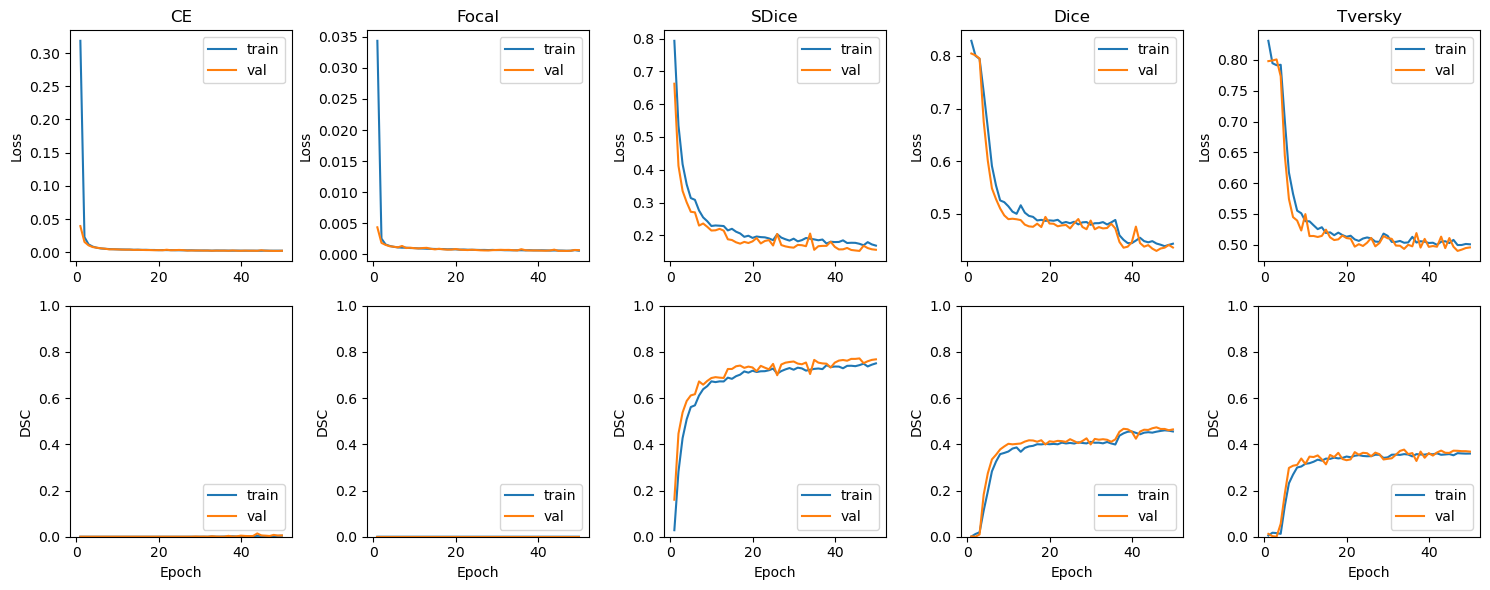

In [44]:
# loss_fns = ['EDL-NLL', 'EDL-CE', 'EDL-SS', 'EDL-SDice', 'EDL-Dice', 'EDL-Tversky', 'EDL-FocalTversky']
# loss_fns = ['EDL-SDice', 'EDL-FocalTversky']
loss_fns = ['CE', 'Focal', 'SDice', 'Dice', 'Tversky']
all_results = display('MALPEM2', loss_fns)

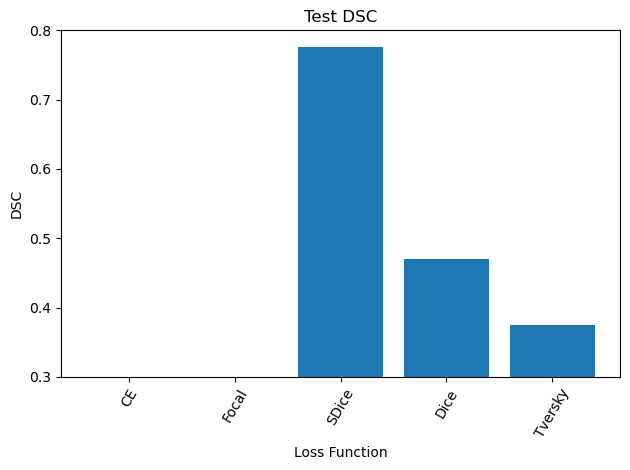

In [47]:
plt.bar(
    range(len(loss_fns)), [np.mean(all_results[loss_fn]['test_DSCs']) for loss_fn in loss_fns],
    # color=['green'] * 2 + ['blue']*3 + ['red']*4
)
plt.xticks(range(len(loss_fns)), loss_fns)
plt.xlabel('Loss Function'); plt.ylabel('DSC'); plt.title('Test DSC')
plt.xticks(rotation=60)
plt.ylim((0.3, 0.8))
plt.tight_layout()
plt.savefig(f'test_dsc.jpeg', dpi=300)
plt.show()